In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import math
from sklearn.metrics import mean_squared_error
from itertools import product
import seaborn; seaborn.set()
%matplotlib inline


In [23]:
df = pd.read_csv('C:/Users/User/Desktop/bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv')
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3161052,1515369360,16167.98,16179.65,16154.59,16154.60,2.887541,46660.414604,16159.221330
3161053,1515369420,16178.07,16178.07,16142.13,16176.43,1.014694,16402.389804,16164.858364
3161054,1515369480,16131.19,16176.10,16114.30,16114.30,16.897225,272434.236630,16123.016402
3161055,1515369540,16169.82,16189.43,16114.49,16124.02,6.384757,103222.040090,16166.949978
3161056,1515369600,16173.98,16176.96,16102.05,16166.78,25.633791,413278.394640,16122.406640


In [24]:
df = pd.read_csv('C:/Users/User/Desktop/bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv')
# 2017 jan
# 2017 oct - 8th jan
train=df[2490000:3017056] #from 01-10-2016 - 30-09-17
test=df[3017057:] # 01-10-2017 - 08-01-2018
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
df.index = df.Timestamp
df = df.resample('D').mean() # aggregating on daily basis
  
#df = df.resample('M').mean()
train.Timestamp = pd.to_datetime(train.Timestamp,unit='s') 
train.index = train.Timestamp # set timestamp as the index
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.Timestamp,unit='s') 
test.index = test.Timestamp 
test = test.resample('D').mean()




In [25]:
train.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2016-09-28,603.745625,603.758750,603.565625,603.755625,0.548430,330.769106,603.612671
2016-09-29,603.928257,604.016049,603.805285,603.917486,2.856273,1724.681035,603.911641
2016-09-30,605.035618,605.128535,604.915674,605.013181,2.601640,1573.906429,605.017242
2016-10-01,611.691229,611.753257,611.641500,611.703965,1.979285,1209.742195,611.695313
2016-10-02,609.314528,609.422757,609.196382,609.317750,1.497508,911.680615,609.294611


In [9]:
test.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-09-30,4270.216074,4271.955490,4268.330188,4270.286637,5.323201,22772.951624,4270.099044
2017-10-01,4290.879264,4292.513625,4288.988646,4290.900590,5.205305,22284.395236,4290.509618
2017-10-02,4395.595528,4397.706764,4392.807063,4395.493111,5.838207,25652.542492,4395.341097
2017-10-03,4311.938333,4314.145292,4309.140639,4311.992896,8.717987,37447.731893,4311.533988
2017-10-04,4249.836465,4251.627278,4247.174708,4249.643597,6.008724,25445.996763,4249.380869


In [10]:
print(train.shape)
print(test.shape)

(367, 7)
(101, 7)


In [11]:
train.describe() 

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,1768.433039,1769.630966,1767.060537,1768.416072,7.505846,15695.012743,1768.322545
std,1178.022648,1179.164353,1176.595672,1177.956286,5.016457,17419.789097,1177.865228
min,603.745625,603.758750,603.565625,603.755625,0.548430,330.769106,603.612671
25%,863.116208,863.799983,862.605733,863.164142,4.081938,3769.836589,863.198405
50%,1192.429083,1192.846611,1192.103542,1192.545056,6.357870,7669.417184,1192.500536
75%,2557.112472,2560.104007,2555.293427,2557.028503,9.348044,21981.409659,2557.067577
max,4801.826097,4804.446132,4797.498319,4801.706236,41.870791,141124.036343,4801.471753


In [12]:
train.isnull().any()

Open                 False
High                 False
Low                  False
Close                False
Volume_(BTC)         False
Volume_(Currency)    False
Weighted_Price       False
dtype: bool

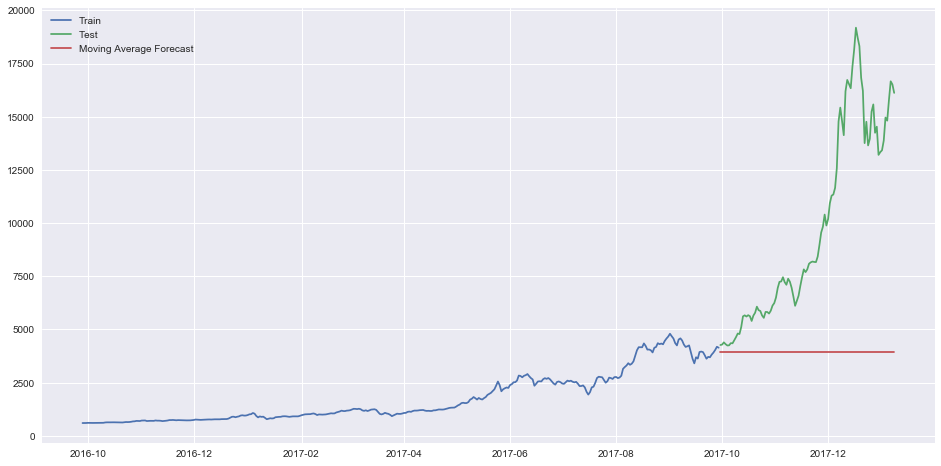

In [13]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Weighted_Price'].rolling(60).mean().iloc[-1] # SELECTING DATA FROM ROW NUMBERS
plt.figure(figsize=(16,8))
plt.plot(train['Weighted_Price'], label='Train')
plt.plot(test['Weighted_Price'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

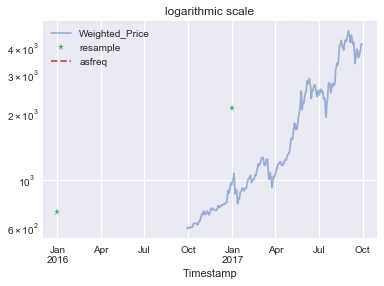

In [14]:
#Resampling at lower frequency
#plot the average of price in the previous year and price at the end of the year
weighted_Price = train['Weighted_Price']
#print(weighted_Price)
weighted_Price.plot(alpha=0.5, style='-')
weighted_Price.resample('BA').mean().plot(style='*') # avg of previous year
weighted_Price.asfreq('BA').plot(style='--') # value at the end of the year
plt.yscale('log')
plt.title("logarithmic scale")
plt.legend(['Weighted_Price', 'resample', 'asfreq'], 
           loc='upper left')
# 'resample'-- average of the previous year
# 'asfreq' -- value at the end of the year

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=200,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


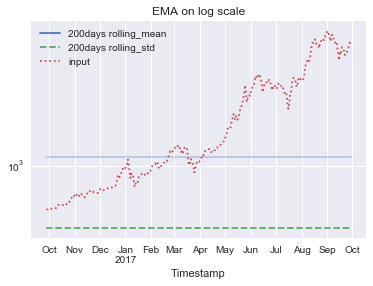

In [17]:
#The Exponentially Weighted Moving Average (EWMA) is a statistic for monitoring the process that averages the data in a way 
#that gives less and less weight to data
rolling = pd.ewma(weighted_Price, com=200) # center of mass : 

data = pd.DataFrame({'input': weighted_Price, 
                     '200days rolling_mean': rolling.mean(), 
                     '200days rolling_std': rolling.std()}) # moving avg : smoothning the data due to fluationi

ax = data.plot(style=['-', '--', ':'])
ax.set_yscale('log')
ax.set_title("EMA on log scale")
ax.lines[0].set_alpha(0.3)

In [18]:
#autoregression: 
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

test = test['Weighted_Price'].values

print(test)

[ 4270.09904362  4290.50961825  4395.34109711  4311.53398815
  4249.38086932  4255.14117063  4359.02571159  4351.11523003
  4495.68274331  4643.25831011  4811.40362944  4786.87981491
  5114.22674297  5617.72855388  5665.83325869  5609.70521025
  5673.30299676  5625.28140199  5401.84142245  5653.87709158
  5788.39517381  6072.98628534  5909.35466505  5868.55444039
  5658.96718301  5547.13609711  5826.22649318  5822.06714383
  5749.52172552  5883.18983378  6122.31554456  6239.75223108
  6501.9271264   6951.55011034  7239.98579691  7257.38299011
  7457.70186427  7227.18831946  7102.41136848  7386.435501
  7244.03997836  6961.08064607  6555.82914952  6113.8012755
  6346.71495066  6590.1457225   7045.89127116  7459.01140241
  7826.66995447  7696.52895975  7825.42031561  8089.82798336
  8157.12061593  8194.20787954  8175.02189417  8167.54723751
  8428.59055039  8971.59499367  9555.69705504  9832.17904349
 10402.34334151  9887.5433868  10193.94721008 10937.45981194
 11290.71944172 11345.14458

In [139]:
#train and fit autoregression
model = AR(train_pr)
model_fit = model.fit()

print("Lag: %s" % model_fit.k_ar)
print("Coefficients: %s" % model_fit.params)

pred = model_fit.predict(start=len(train), end=len(train_pr)+len(test)-1, dynamic=False)
#mse = mean_squared_error(test, pred)
#print("Test MSE {0:.3f}".format(mse))

Lag: 17
Coefficients: [ 1.40579501e+00  1.28416421e+00 -3.59431363e-01  1.55264852e-03
  1.15429062e-01 -9.35948809e-02  2.33268318e-02  1.60494782e-01
 -1.75698848e-01  2.56073311e-02  6.66696261e-02 -6.24868195e-02
  5.80841061e-02 -5.11266516e-02  1.24065400e-03  2.84771150e-03
  9.89608734e-03 -1.73333988e-03]


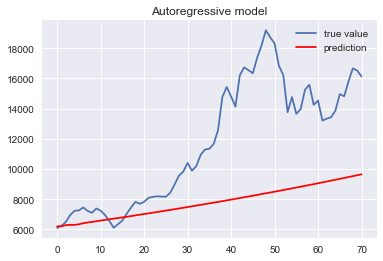

In [97]:
plt.plot(test, label='true value')
plt.plot(pred, color='red', label='prediction')
plt.title("Autoregressive model")
plt.legend()